python verson : 3.10.11

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
plt.rcParams['font.family'] = 'AppleGothic'

In [16]:
# CSV 파일 경로
csv_file_path = '../data/dataCard.csv'

# CSV 파일을 DataFrame으로 읽어들이기
df = pd.read_csv(csv_file_path)
df

,Date,Time,이용카드명,Location,Domestic Amount (KRW),Foreign Amount (USD),Discount Amount,Expected Points,Status,Payment Due Date,Approval Number
0,2023-08-20,13:20,KB국민 톡톡 with 리브메이트카드,카카오개인택시영세,4600,0.0,0,0,전표미매입,NaN,30012912
1,2023-08-20,13:09,KB국민 톡톡 with 리브메이트카드,카카오택시 선승인 로카모빌리티,4500,0.0,0,0,승인취소,NaN,30012901
2,2023-08-20,00:18,KB국민 톡톡 with 리브메이트카드,헥토_대표(구),432,0.0,0,0,전표미매입,NaN,30012891
3,2023-08-20,00:10,KB국민 톡톡 with 리브메이트카드,헥토_대표(구),1144,0.0,0,0,전표미매입,NaN,30012880
4,2023-08-20,00:02,KB국민 톡톡 with 리브메이트카드,밥끼,800,0.0,0,0,전표미매입,NaN,30012872
...,...,...,...,...,...,...,...,...,...,...,...
714,2023-01-09,10:35,KB국민 톡톡 with 리브메이트카드,NaN,0,10.1,0,0,전표매입,2023-02-01,305697
715,2023-01-09,09:54,KB국민 톡톡 with 리브메이트카드,LGUPLUS 통신요금자동이체,10350,0.0,0,0,전표매입,2023-02-01,30005688
716,2023-01-05,21:15,KB국민 톡톡 with 리브메이트카드,한국철도공사,8300,0.0,0,0,전표매입,2023-02-01,30005677
717,2023-01-03,04:07,KB국민 톡톡 with 리브메이트카드,Amazon_AWS,718,0.0,0,0,전표매입,2023-02-01,30005668


In [17]:
df.Status.unique()

array(['전표미매입', '승인취소', '전표매입', '취소전표매입'], dtype=object)

In [18]:
df_filtered = df[df['Status'] == '전표매입']
df_filtered

,Date,Time,이용카드명,Location,Domestic Amount (KRW),Foreign Amount (USD),Discount Amount,Expected Points,Status,Payment Due Date,Approval Number
5,2023-08-19,00:00,KB국민 톡톡 with 리브메이트카드,지에스25 강원대기숙사점,7200,0.0,0,0,전표매입,2023-09-14,30012867
6,2023-08-18,20:39,KB국민 톡톡 with 리브메이트카드,헥토_대표(구),432,0.0,0,0,전표매입,2023-09-14,30012846
7,2023-08-18,20:34,KB국민 톡톡 with 리브메이트카드,헥토_대표(구),544,0.0,0,0,전표매입,2023-09-14,30012835
8,2023-08-18,14:57,KB국민 톡톡 with 리브메이트카드,애플코리아 유한회사,459000,0.0,0,0,전표매입,2023-09-14,30012827
9,2023-08-18,06:21,KB국민 톡톡 with 리브메이트카드,쿠팡(쿠페이),2290,0.0,0,0,전표매입,2023-09-14,30012812
...,...,...,...,...,...,...,...,...,...,...,...
714,2023-01-09,10:35,KB국민 톡톡 with 리브메이트카드,NaN,0,10.1,0,0,전표매입,2023-02-01,305697
715,2023-01-09,09:54,KB국민 톡톡 with 리브메이트카드,LGUPLUS 통신요금자동이체,10350,0.0,0,0,전표매입,2023-02-01,30005688
716,2023-01-05,21:15,KB국민 톡톡 with 리브메이트카드,한국철도공사,8300,0.0,0,0,전표매입,2023-02-01,30005677
717,2023-01-03,04:07,KB국민 톡톡 with 리브메이트카드,Amazon_AWS,718,0.0,0,0,전표매입,2023-02-01,30005668


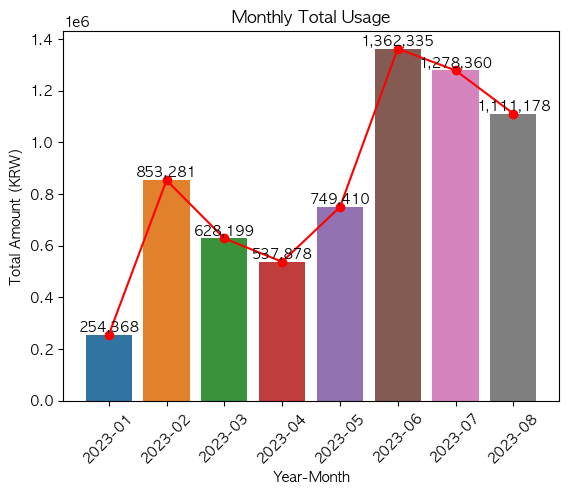

In [19]:
# 1. 월별 전체 사용량 시각화 (추세선 포함)
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_total = df.groupby('YearMonth')['Domestic Amount (KRW)'].sum()
monthly_total.index = monthly_total.index.astype(str)
monthly_total = monthly_total.astype(int)

sns.barplot(x=monthly_total.index, y=monthly_total)

# Connect the values of the bars
plt.plot(range(len(monthly_total)), monthly_total, marker='o', color='r')

# Add value labels
for i, value in enumerate(monthly_total):
    plt.text(i, value, f'{value:,}', ha='center', va='bottom')

plt.xlabel('Year-Month')
plt.ylabel('Total Amount (KRW)')
plt.title('Monthly Total Usage')
plt.xticks(rotation=45)

plt.savefig('../result_image/1.(상반기)월간카드사용량.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

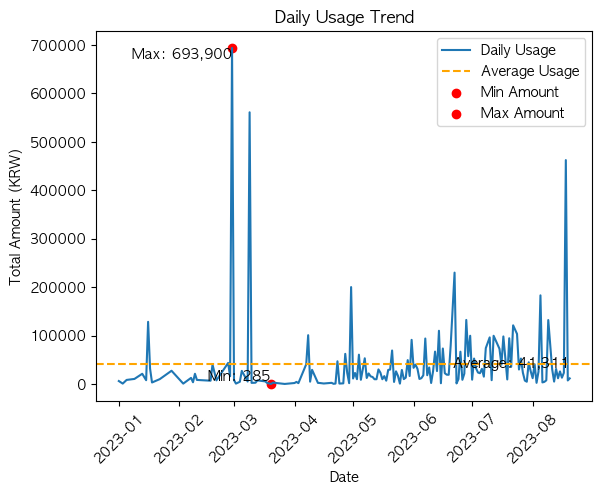

In [20]:
# 2. 일별 사용량 추세선 시각화
df['Date'] = pd.to_datetime(df['Date'])
daily_total = df.groupby('Date')['Domestic Amount (KRW)'].sum()
daily_mean = daily_total.mean()

# 최소금액과 최대금액을 구합니다.
daily_total_without_zero = daily_total[daily_total > 0]
min_amount = daily_total_without_zero.min()
max_amount = daily_total.max()

sns.lineplot(x=daily_total.index, y=daily_total, label='Daily Usage')
plt.axhline(daily_mean, color='orange', linestyle='--', label='Average Usage')
plt.text(daily_total.index[-1], daily_mean, f'Average: {daily_mean:,.0f}', ha='right', va='center')

# 최소금액과 최대금액을 표시합니다.
plt.scatter(daily_total.idxmin(), min_amount, color='red', marker='o', label='Min Amount')
plt.text(daily_total.idxmin(), min_amount, f'Min: {min_amount:,.0f}', ha='right', va='bottom')
plt.scatter(daily_total.idxmax(), max_amount, color='red', marker='o', label='Max Amount')
plt.text(daily_total.idxmax(), max_amount, f'Max: {max_amount:,.0f}', ha='right', va='top')

plt.xlabel('Date')
plt.ylabel('Total Amount (KRW)')
plt.title('Daily Usage Trend')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('../result_image/2.(상반기)일별카드사용량.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


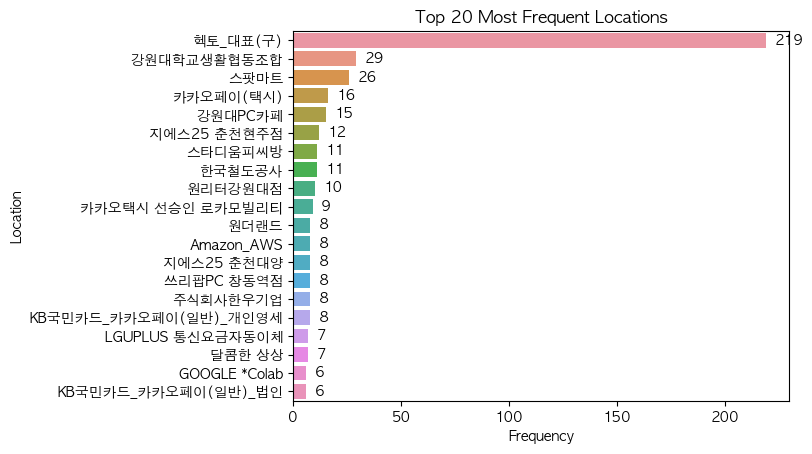

In [21]:
# 3. 빈도가 높은 사용처 순위 시각화
top_locations = df['Location'].value_counts().nlargest(20)
sns.barplot(x=top_locations.values, y=top_locations.index)

for i, v in enumerate(top_locations.values):
    plt.text(v + 4, i, str(v), ha='left', va='center')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Top 20 Most Frequent Locations')
plt.savefig('../result_image/3.(상반기)빈도별카드사용량.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

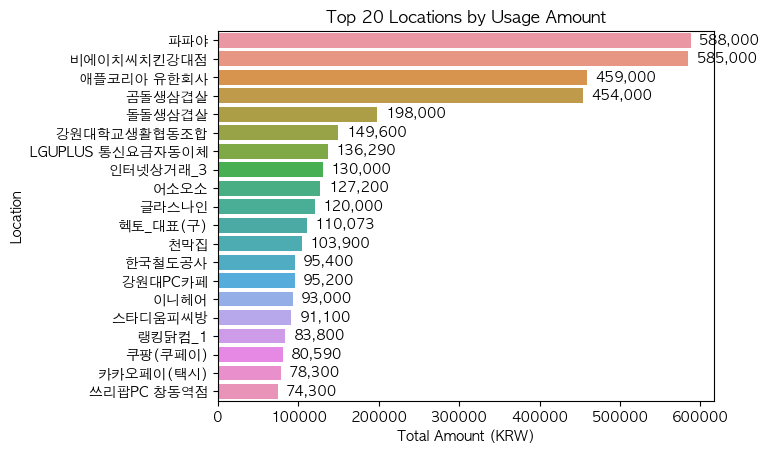

In [22]:
# 4. 사용량이 많은 사용처 순위 시각화
top_usage_locations = df.groupby('Location')['Domestic Amount (KRW)'].sum().nlargest(20)

sns.barplot(x=top_usage_locations.values, y=top_usage_locations.index)

for i, v in enumerate(top_usage_locations.values):
    plt.text(v + 10000, i, '{:,}'.format(v), ha='left', va='center')

plt.xlabel('Total Amount (KRW)')
plt.ylabel('Location')
plt.title('Top 20 Locations by Usage Amount')
plt.savefig('../result_image/4.1.(상반기)사용처기준카드사용량.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

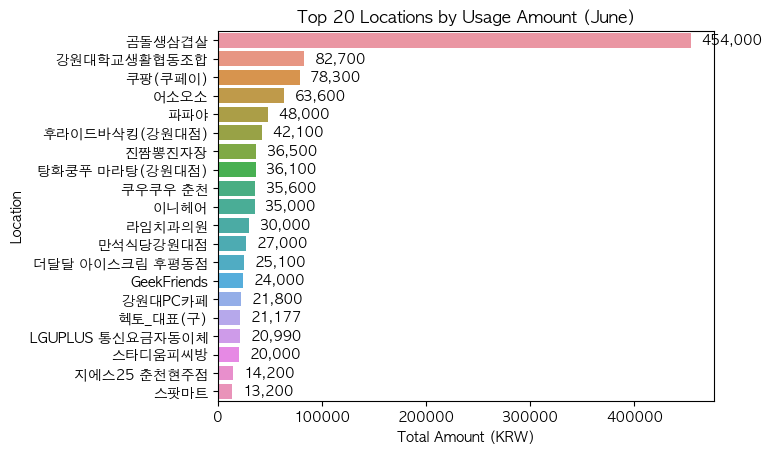

In [23]:
# 4-2. (6월)사용량기준 사용처 순위 시각화(6월)
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

# Filter data for June
june_df = df[df['YearMonth'] == '2023-06']
top_usage_locations = june_df.groupby('Location')['Domestic Amount (KRW)'].sum().nlargest(20)

sns.barplot(x=top_usage_locations.values, y=top_usage_locations.index)

for i, v in enumerate(top_usage_locations.values):
    plt.text(v + 10000, i, '{:,}'.format(v), ha='left', va='center')

plt.xlabel('Total Amount (KRW)')
plt.ylabel('Location')
plt.title('Top 20 Locations by Usage Amount (June)')
plt.savefig('../result_image/4.2.(6월)사용량기준 사용처 순위 시각화.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

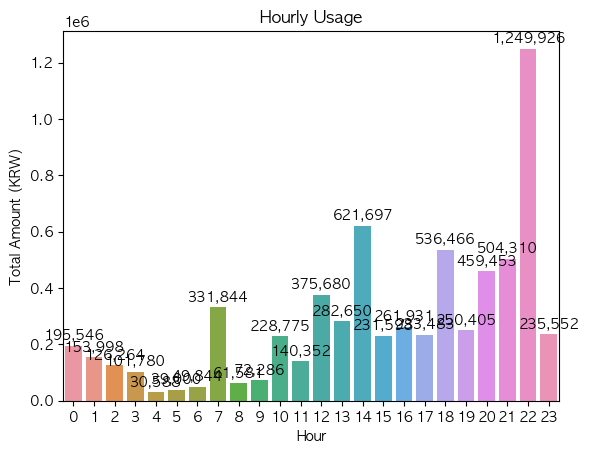

In [24]:
# 5. 시간대별 사용량 시각화 (한 시간 기준)
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
hourly_usage = df.groupby('Hour')['Domestic Amount (KRW)'].sum()
sns.barplot(x=hourly_usage.index, y=hourly_usage)

for i, v in enumerate(hourly_usage.values):
    plt.text(i, v + 10000, '{:,}'.format(v), ha='center', va='bottom')

plt.xlabel('Hour')
plt.ylabel('Total Amount (KRW)')
plt.title('Hourly Usage')
plt.savefig('../result_image/5.(상반기)시간대별 사용량.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

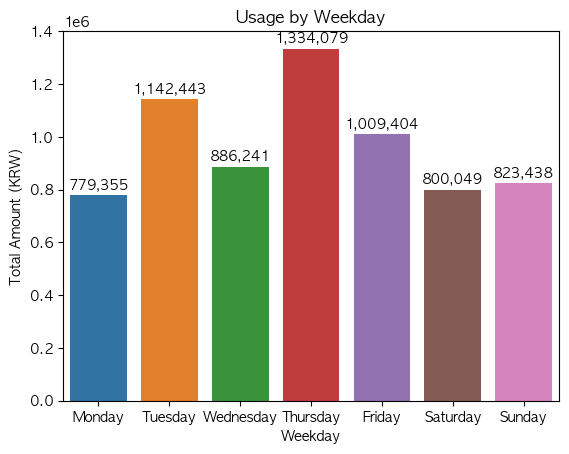

In [25]:
# 6. 요일별 사용량 시각화
df['Weekday'] = df['Date'].dt.weekday
weekday_usage = df.groupby('Weekday')['Domestic Amount (KRW)'].sum()
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekday_labels, y=weekday_usage)

for i, v in enumerate(weekday_usage.values):
    plt.text(i, v + 10000, '{:,}'.format(v), ha='center', va='bottom')

plt.xlabel('Weekday')
plt.ylabel('Total Amount (KRW)')
plt.title('Usage by Weekday')
plt.savefig('../result_image/6.(상반기)요일별 사용량 시각화.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()